In [1]:
'''
co-occurence matrix(동시발생행렬)
- 문장의 토큰별로 window size만큼 좌우의 토큰에 어떤 단어가 몇 번 나타났는지 센 다음
나타난 단어에 개수만큼 값을 부여하여 특정 토큰에 대한 벡터를 만든 뒤
해당 벡터를 모두 모아 하나의 행렬로 표현한 것.
- 즉, 토큰 좌우 단어의 빈도를 값으로 하는 행렬.
- 빈도만을 기준으로 값을 채우므로 단어 간 의미적 연관성을 고려하지 않는다.

ex) I say hello you say goodbye
1. 각 토큰으로 lexicon을 만든다.
  --> I, say, hello, you, goodbye
  
2. lexicon의 각 토큰별로 윈도우 사이즈만큼 좌, 우로 어떤 단어가 나타났는지 확인.
  #window size를 1로 설정했다고 가정한다.
  1) I --> say
  2) say --> I, hello, you, goodbye
  3) hello --> say, you
  4) you --> hello, say
  5) goodbye --> say
  
3. row, column이 모두 lexicon의 토큰들인 행렬을 만들고 행렬의 값에는 
   특정 토큰에 대해 좌우로 등장한 토큰이 있으면(동시발생했다면) 
   등장한 횟수만큼 수를 채워준다

<행렬>

         I    say     hello    you    goodbye
I        0     1        0       0        0
say      1     0        1       1        1
hello    0     1        0       1        0
you      0     1        1       0        0
goodbye  0     1        0       0        0

'''

'''
PMI(Pointwise Mutual Information): 점별 상호정보량
- 동시발생행렬의 값을 확률로 바꾼 것.
- 의미론적 연관성을 더 반영한 방법
   car이라는 토큰에 대해 
   the car, car drive 표현이 등장한다고 했을 때,
   the의 출현 빈도가 더 많다고 해도 의미적으로는 drive와 더 연관이 있다.
   PMI를 적용하면 car과 drive의 연관성이 더 크도록 drive에 더 높은 확률을 부여한다
   

- PMI 구하는 공식
PMI(x,y) = log2( p(x,y) / ( P(x)*P(y) ) ) #값이 높을수록 관련성 높다.

이 식을 동시발생행렬을 사용하여 일반화 하면

####################################################

C 
= PMI(x, y)
= log2( ( C(x,y)/N ) / ( (C(x)/N) * (C(y)/N) ) )
= log2( ( C(x,y)*N ) / ( C(x) * C(y) ) )

# C: 동시발생행렬
# C(x,y): x단어와 y단어가 동시에 발생하는 횟수
# C(x) , C(y): 각 단어가 등장하는 횟수
# N: lexicon에 들어있는 전체 단어 개수

####################################################


그런데 PMI 계산시 두 단어가 서로 동시에 발생하지 않는 경우
C(x,y)=0이므로 log2에 0이 들어가게 된다.
그런데 log2(0) 의 값은 구할 수 없다. 음의 무한대이기 때문.

따라서 log에 0이 들어갈 가능성을 방지하기 위해
PPMI(Positive Pointwise Mutual Information)을 이용한다.

PPMI는 PMI값이 0 이상이면 해당 PMI 값을 반환하고
               0 미만이면 PMI값을 0으로 반환하는 계산방법이다.
               
C 
= PPMI(x, y) = max(0, PMI(x,y))  #보통 PPMI를 자주 사용한다.
'''

'\nPMI(Pointwise Mutual Information): 점별 상호정보량\n- 동시발생행렬의 값을 확률로 바꾼 것.\n- 의미론적 연관성을 더 반영한 방법\n   car이라는 토큰에 대해 \n   the car, car drive 표현이 등장한다고 했을 때,\n   the의 출현 빈도가 더 많다고 해도 의미적으로는 drive와 더 연관이 있다.\n   PMI를 적용하면 car과 drive의 연관성이 더 크도록 drive에 더 높은 확률을 부여한다\n   \n\n- PMI 구하는 공식\nPMI(x,y) = log2( p(x,y) / ( P(x)*P(y) ) ) #값이 높을수록 관련성 높다.\n\n이 식을 동시발생행렬을 사용하여 일반화 하면\n\n####################################################\n\nC \n= PMI(x, y)\n= log2( ( C(x,y)/N ) / ( (C(x)/N) * (C(y)/N) ) )\n= log2( ( C(x,y)*N ) / ( C(x) * C(y) ) )\n\n# C: 동시발생행렬\n# C(x,y): x단어와 y단어가 동시에 발생하는 횟수\n# C(x) , C(y): 각 단어가 등장하는 횟수\n# N: lexicon에 들어있는 전체 단어 개수\n\n####################################################\n\n\n그런데 PMI 계산시 두 단어가 서로 동시에 발생하지 않는 경우\nC(x,y)=0이므로 log2에 0이 들어가게 된다.\n그런데 log2(0) 의 값은 구할 수 없다. 음의 무한대이기 때문.\n\n따라서 log에 0이 들어갈 가능성을 방지하기 위해\nPPMI(Positive Pointwise Mutual Information)을 이용한다.\n\nPPMI는 PMI값이 0 이상이면 해당 PMI 값을 반환하고\n               0 미만이면 PMI값을 0으로 반환하는 계산방법이다.\n               \nC \n= 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

In [5]:
doc = 'I say hello you say goodbye. Say you love me and I will'

In [13]:
#1. CountVectorizer을 이용해서 동시발생행렬 만든다.
  # --> preprocessing, lowercap, lexicon 필요함.
  #영행렬을 만들어준 뒤
  #matrix 업데이트 해준다.

In [9]:
#token_pattern = r'\b\w+\b' : 단어 경계 안에 단어들이 있음을 알려줌

bow = CountVectorizer(stop_words = None, token_pattern = r'\b\w+\b') 
bow.fit_transform([doc]) #fit_transform은 리스트 형태로 받아야 한다.

<1x9 sparse matrix of type '<class 'numpy.int64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [15]:
lexicon = bow.get_feature_names() #문장 내 중복 제거된 단어들을 리스트로 반환(마침표도 제거됨)
lexicon

['and', 'goodbye', 'hello', 'i', 'love', 'me', 'say', 'will', 'you']

In [21]:
lexicon.index('hello') #리스트.index('단어') : 해당 단어의 인덱스를 반환함.

2

In [16]:
n = len(lexicon) #lexicon에 들어있는 단어 개수
zero_matrix = np.zeros((n,n), dtype = np.int32)
zero_matrix

array([[0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [18]:
#토큰 좌, 우로 단어를 각각 1개씩 살펴봄
window_size = 1
#마침표 제거 후 추후 중복제거를 위해 모두 소문자화함. 그리고 띄어쓰기 단위로 토크나이징
word_list = doc.replace('.','').lower().split() 
word_list # 아직 중복제거는 안 된 상태

['i',
 'say',
 'hello',
 'you',
 'say',
 'goodbye',
 'say',
 'you',
 'love',
 'me',
 'and',
 'i',
 'will']

In [19]:
#focus_word: 해당 토큰
#focus_idx : 해당 토큰의 인덱스
#context_word : 해당 토큰의 좌, 우에 있는 단어
#context_idx: 해당 토큰 좌, 우에 있는 단어의 인덱스
#enumerate(시퀀스): 시퀀스의 각 원소에 대해 인덱스와 그 원소를 튜플로 반환하는 함수

for focus_idx, focus_word in enumerate(word_list):
    #토큰의 왼쪽 단어 인덱스(윈도우 사이즈만큼 참조함)
    left = max(0, (focus_idx - window_size)) #최소 0번 인덱스부터 시작
    right = min((focus_idx + window_size + 1), len(word_list)) #최대 word_list의 길이까지 인덱스 있음.
    
    for context_idx in range(left, right): 
        context_word = word_list[context_idx]
        
        if context_idx == focus_idx:
            pass
        else:
            if context_word in lexicon:
                row_idx = lexicon.index(focus_word) #행
                col_idx = lexicon.index(context_word) #열
                
                zero_matrix[row_idx, col_idx] += 1
                
zero_matrix

array([[0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1],
       [1, 0, 0, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 1],
       [1, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 2, 1, 1, 0, 0, 0, 0, 2],
       [0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 2, 0, 0]])

In [22]:
df = pd.DataFrame(zero_matrix, columns = lexicon, index = lexicon)
df

,and,goodbye,hello,i,love,me,say,will,you
and,0,0,0,1,0,1,0,0,0
goodbye,0,0,0,0,0,0,2,0,0
hello,0,0,0,0,0,0,1,0,1
i,1,0,0,0,0,0,1,1,0
love,0,0,0,0,0,1,0,0,1
me,1,0,0,0,1,0,0,0,0
say,0,2,1,1,0,0,0,0,2
will,0,0,0,1,0,0,0,0,0
you,0,0,1,0,1,0,2,0,0


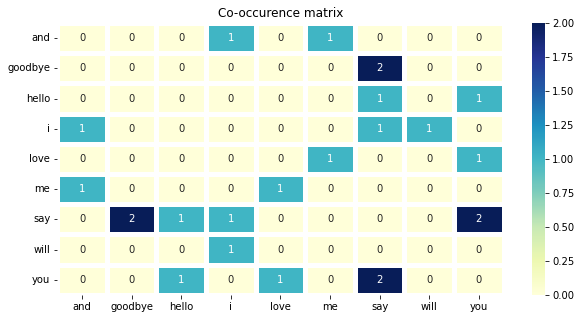

In [23]:
plt.figure(figsize=(10,5))
sns.heatmap(df,
            annot = True,
            xticklabels = lexicon,
            yticklabels=lexicon,
            linewidth=5,
            cmap='YlGnBu') #yellow, green, blue

plt.title('Co-occurence matrix')
plt.show()

In [24]:
#2. 단어들을 인덱스로 처리하여 동시발생행렬 만드는 방법

# I say hello you say goodbye
# 1  2    3    4   2     5 

#위와 같은 방식으로 단어들을 인덱스로 처리하고 
#각 인덱스를 이용하여 동시발생행렬을 만든다.

In [25]:
word2idx = dict()
idx2word = dict()

word_list = doc.replace('.','').lower().split()

for word in word_list:
    if word not in word2idx:
        index = len(word2idx)
        word2idx[word] = index
        idx2word[index] = word
        
print(word2idx)
print(idx2word)

{'i': 0, 'say': 1, 'hello': 2, 'you': 3, 'goodbye': 4, 'love': 5, 'me': 6, 'and': 7, 'will': 8}
{0: 'i', 1: 'say', 2: 'hello', 3: 'you', 4: 'goodbye', 5: 'love', 6: 'me', 7: 'and', 8: 'will'}


In [27]:
#이제 각 토큰을 인덱스로 처리한다.(doc --> idx)

doc_idx = [word2idx[word] for word in word_list]
print(word_list)
print(doc_idx)

['i', 'say', 'hello', 'you', 'say', 'goodbye', 'say', 'you', 'love', 'me', 'and', 'i', 'will']
[0, 1, 2, 3, 1, 4, 1, 3, 5, 6, 7, 0, 8]


In [28]:
#lexicon 길이에 맞춰서 zero_vector을 만들어야 한다.
#word_list의 길이도 알아야 한다.

doc_size = len(word_list)
lexicon_size = len(set(doc_idx)) #각 단어를 인덱스화 한 것을 중복 제거하여 길이 잼.

print(doc_size, lexicon_size)

zero_matrix = np.zeros((lexicon_size, lexicon_size), dtype = np.int32)

zero_matrix

13 9


array([[0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [30]:
#각 단어의 인덱스를 하나씩 꺼내오면서 좌우 인덱스 살펴보고 동시발생행렬 만들기

#doc_idx == [0, 1, 2, 3, 1, 4, 1, 3, 5, 6, 7, 0, 8]

for focus_idx, focus_word_idx in enumerate(doc_idx):
    #left, right idx
    
      # 왼쪽 단어 시작 인덱스는 0부터임. 0일때부터 조건문 수행
    left = focus_idx - window_size 
    right = focus_idx + window_size  # 12 + 1 = 13 
      #오른쪽 단어 마지막 인덱스는 12임
        # --> 13 나오면 조건문의 조건 불만족하므로 반복문에서 빠져나옴
    
    if left >= 0:
        left_idx = doc_idx[left]
        zero_matrix[focus_word_idx, left_idx] += 1
        
    if right < doc_size:
        right_idx = doc_idx[right]
        zero_matrix[focus_word_idx, right_idx] += 1
zero_matrix

array([[0, 1, 0, 0, 0, 0, 0, 1, 1],
       [1, 0, 1, 2, 2, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 0, 0, 0, 0],
       [0, 2, 1, 0, 0, 1, 0, 0, 0],
       [0, 2, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0]])

In [31]:
pd.DataFrame(zero_matrix,
             columns = idx2word.values(),
             index = idx2word.values())

,i,say,hello,you,goodbye,love,me,and,will
i,0,1,0,0,0,0,0,1,1
say,1,0,1,2,2,0,0,0,0
hello,0,1,0,1,0,0,0,0,0
you,0,2,1,0,0,1,0,0,0
goodbye,0,2,0,0,0,0,0,0,0
love,0,0,0,1,0,0,1,0,0
me,0,0,0,0,0,1,0,1,0
and,1,0,0,0,0,0,1,0,0
will,1,0,0,0,0,0,0,0,0


In [84]:
from sklearn.metrics.pairwise import cosine_similarity
cosine=cosine_similarity(zero_matrix, zero_matrix)
word = 'me'
idx=word2idx[word]
t=np.argsort(cosine[idx])[::-1][1:]

count = 0
for t in t:
    if count < 5:
        print(idx2word[t])
        count += 1

i
you
will
and
love


In [95]:
#document = doc
#def most_similar(query, document, top=5): #query넣고 document 넣었을 때 상위 5개 단어 출력.
  #동시발생행렬만들고 이 행렬을 이용하여 가장 유사한 단어 5개를 반환하는 함수 만들기.
  #예를 들면 say를 넣었을 때 이와 유사한 단어 5개 반환하는 방식
  #doc_idx, word2idx, idx2word
    
def most_similar(query, document, top=5):
    window_size = 1
    doc = document
    word_list = doc.replace('.','').lower().split()
    
    word2idx = dict()
    idx2word = dict()
    
    for word in word_list:
        if word not in word2idx:
            index = len(word2idx)
            word2idx[word] = index
            idx2word[index] = word
    
    doc_idx = [word2idx[word] for word in word_list]
    lexicon_size = len(set(doc_idx))
    zero_matrix = np.zeros((lexicon_size, lexicon_size), dtype=np.int32)        
    
    for focus_idx, focus_word_idx in enumerate(doc_idx):
        left = focus_idx - window_size
        right = focus_idx + window_size
        
        if left >= 0 :
            left_idx = doc_idx[left]
            zero_matrix[focus_word_idx, left_idx] += 1
            
        if right < len(word_list):
            right_idx = doc_idx[right]
            zero_matrix[focus_word_idx, right_idx] += 1
            
            
    from sklearn.metrics.pairwise import cosine_similarity
    cosine = cosine_similarity(zero_matrix, zero_matrix)
    w = query
    idx = word2idx[w]
    rev_sorted_word_idxs = np.argsort(cosine[idx])[::-1][1:] #자기자신 제외
        
    count = 0
    for i in rev_sorted_word_idxs:
        if count < top:
            print(idx2word[i])
            count += 1
                
    

In [96]:
most_similar('me', 'I say hello you say goodbye. Say you love me and I will', top=5)

i
you
will
and
love


In [97]:
document = 'I am a boy and you are a girl and say hiphop'
most_similar('girl', document, top=5)

boy
say
are
you
am
